<a href="https://colab.research.google.com/github/FeliciaSchenkelberg/Algorithms-and-Data-Structure/blob/main/Copy_of_Copy_of_assignment_4_Fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2022 Assignment 4**

*Due October 11, 2022 at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski and Clement Nyanhongo


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)
  *   [tensorflow](https://www.tensorflow.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [ ]:
''' Import Statements '''
import os
import csv
import json
import pickle
import tqdm
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Loading
In this assignment we will be using the Yoga Postures Dataset from [Kaggle](https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset) and will use the following code blocks to download the dataset directly to your Google Drive.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Image Paths from Mounted Drive
train_path = "/content/drive/MyDrive/Colab_Notebooks/Assignment_4/datasets/train"
test_path = "/content/drive/MyDrive/Colab_Notebooks/Assignment_4/datasets/test"

In [ ]:
# Number of Samples to Work Through: 10.
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(28,28),classes=["Adho Mukha Svanasana", "Adho Mukha Vrksasana", "Alanasana", "Anjaneyasana", "Ardha Chandrasana", "Ardha Matsyendrasana", "Ardha Navasana", "Ardha Pincha Mayurasana", "Ashta Chandrasana", "Baddha Konasana", "Bakasana", "Balasana", "Bitilasana", "Camatkarasana", "Dhanurasana", "Eka Pada Rajakapotasana", "Garudasana", "Halasana", "Hanumanasana", "Malasana", "Marjaryasana", "Navasana", "Padmasana", "Parsva Virabhadrasana", "Parsvottanasana", "Paschimottanasana", "Phalakasana", "Pincha Mayurasana", "Salamba Bhujangasana", "Salamba Sarvangasana", "Setu Bandha Sarvangasana", "Sivasana", "Supta Kapotasana", "Trikonasana", "Upavistha Konasana", "Urdhva Dhanurasana", "Urdhva Mukha Svsnssana", "Ustrasana", "Utkatasana", "Uttanasana", "Utthita Hasta Padangusthasana", "Utthita Parsvakonasana", "Vasisthasana", "Virabhadrasana One", "Virabhadrasana Three", "Virabhadrasana Two", "Vrksasana"],batch_size=10)
test_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(28,28),classes=["Adho Mukha Svanasana", "Adho Mukha Vrksasana", "Alanasana", "Anjaneyasana", "Ardha Chandrasana", "Ardha Matsyendrasana", "Ardha Navasana", "Ardha Pincha Mayurasana", "Ashta Chandrasana", "Baddha Konasana", "Bakasana", "Balasana", "Bitilasana", "Camatkarasana", "Dhanurasana", "Eka Pada Rajakapotasana", "Garudasana", "Halasana", "Hanumanasana", "Malasana", "Marjaryasana", "Navasana", "Padmasana", "Parsva Virabhadrasana", "Parsvottanasana", "Paschimottanasana", "Phalakasana", "Pincha Mayurasana", "Salamba Bhujangasana", "Salamba Sarvangasana", "Setu Bandha Sarvangasana", "Sivasana", "Supta Kapotasana", "Trikonasana", "Upavistha Konasana", "Urdhva Dhanurasana", "Urdhva Mukha Svsnssana", "Ustrasana", "Utkatasana", "Uttanasana", "Utthita Hasta Padangusthasana", "Utthita Parsvakonasana", "Vasisthasana", "Virabhadrasana One", "Virabhadrasana Three", "Virabhadrasana Two", "Vrksasana"],batch_size=10,shuffle=False)

Found 2227 images belonging to 47 classes.
Found 529 images belonging to 47 classes.


# Problem 1: Support Vector Machine Classification
In this problem, you will be building support vector machines for some cool classification tasks.

## Task 1: Synthetic Data
 In this part we will be exploring the *circles* dataset. This dataset is avialable as a pickle file labeled *circles.pk* in your assignment repository under datasets. In this dataset you will have an $X$ array of 2 dimensional samples of the form $(x_1, x_2)$ and a $y$ array of each samples associated label. 

### Part A
Upload this dataset to your Google Drive and load the dataset into memory using the pickle module (*Hint: Refer to previous assignments to figure out how to do this*). Go through the circles dataset and create a scatterplot of the circles data using the y label as each sample's color to designate their respective class.

In [ ]:
circles_path = '/content/drive/MyDrive/Colab_Notebooks/Assignment_4/datasets/circles.pk'

# TODO: Load the dataset using pickle load 
with open(circles_path, 'rb') as circles_file:
  circles = pickle.load(circles_file)

In [ ]:
my_data = pickle.load(open(circles_path, 'rb'))
print(len(my_data))

2


In [ ]:
x1, x2 = pickle.load(open(circles_path, 'rb'))

<Figure size 432x288 with 0 Axes>

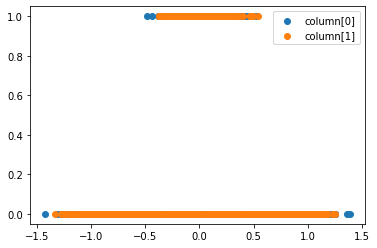

In [ ]:
# As stated above, the optimal value of k is 4.
figure = plt.figure()
figure, axes = plt.subplots()

# Read all datapoints
axes.scatter(x1[:,0], x2, label='column[0]')
axes.scatter(x1[:,1], x2, label='column[1]')

# Draw Scatterplot
plt.legend()
plt.show()

### Part B
Is this dataset linearly seperable? Explain why or why not?

**TODO:** Yes, because according to x2, the data graphed is binary.

### Part C
Can you think of a transformation that can be applied to this dataset that could make it linearly seperable? If so, define what these transformation function(s) might look like, and if not explain why. *Hint: Think of a higher dimensional space.*

**TODO:** This data is already linearly seperable. No transformation needed.

### Part D
If you where able to find a transformation in (Part C), create a suitable graph showing that the dataset is linearly seperable in this new feature space.

<Figure size 432x288 with 0 Axes>

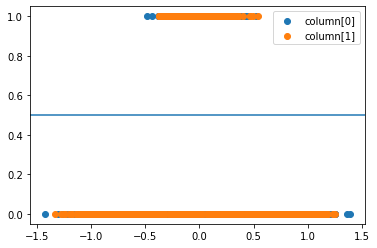

In [ ]:
# As stated above, the optimal value of k is 4.
figure = plt.figure()
figure, axes = plt.subplots()

# Read all datapoints
axes.scatter(x1[:,0], x2, label='column[0]')
axes.scatter(x1[:,1], x2, label='column[1]')
axes.axhline(y=0.5)

# Draw Scatterplot
plt.legend()
plt.show()

## Task 2: Yoga Pose Classification
What we accomplished in Part 1 is known as the kernel trick for SVMs. Now let's focus on how we can use this idea to accomplish non-linear classification on a real world dataset. In this next part and throughout the remainder of the assignment we will be using a yoga postures dataset. These images are PNG and JPEG images with many pixels. 

### Part A
You have been given a number of code skeletons throughout the course all of which load and preprocess the data for you. In this excerise tho, we will be doing the data loading manually as it is an important skill to learn. Write some code that will walk through the *Yoga Postures Dataset* directory structure and build a single large numpy array (Make sure to resize the image to something like (28, 28) or (32, 32) for the SVM and at minimum (71, 71) for the deep learning tasks) *Hint: You have been provided with a basic skeleton, study the operations of the code and finish the script.*

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


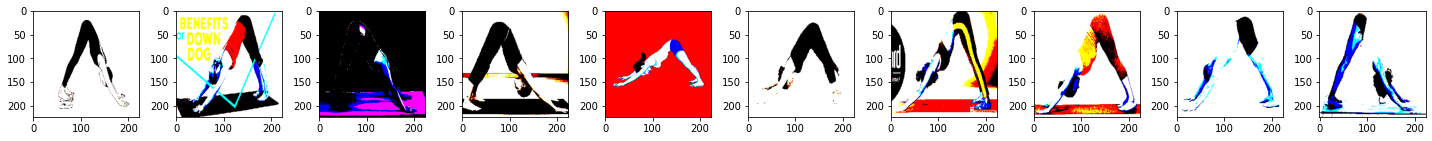

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
# Plot Images
# Reference: https://www.tensorflow.org/tutorials/images/classification
images, labels = next(test_batches)

def plotImages(images):
    figure, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for image, axes_image in zip(images, axes):
        axes_image.imshow(image)
    plt.tight_layout()
    plt.show()

plotImages(images)
print(labels)

### Part B
Implement a SVM classifer using sklearn and report your classification results on the testing dataset. Make sure to flatten your X data from the three channels before passing into the SVM.

In [ ]:
# imports
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_batches)

scaler = StandardScaler()
SVM = svm.SVC()

pipeline_1 = make_pipeline(scaler, SVM)

def train(model, x_train, y_train):
	for epoch in range(1): # epochs
		for batch in range(10): # batches
			model.fit(x_train, y_train)
			return model
		
train(pipeline_1, x_train, y_train)

223

In [ ]:
train(model, x_test, y_test)

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab_Notebooks/Assignment_4/saved_model/my_model')

# Problem 2: Introduction to TensorFlow
In this problem, we will start working in tensorflow to build deep learning systems starting with fully-connected (FC) and convolutional (CNN) neural networks. We will focus on using the yoga postures dataset, ending this problem with a small class competition that may come with a prize...

In [ ]:
# Sequential model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same",input_shape=(224,224,3)),
    Flatten(),
    Dense(units=47,activation="softmax")
])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from sklearn.model_selection import train_test_split

train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
		.flow_from_directory(directory=train_path,target_size=(224,224),classes=["Adho Mukha Svanasana", "Adho Mukha Vrksasana", "Alanasana", "Anjaneyasana", "Ardha Chandrasana", "Ardha Matsyendrasana", "Ardha Navasana", "Ardha Pincha Mayurasana", "Ashta Chandrasana", "Baddha Konasana", "Bakasana", "Balasana", "Bitilasana", "Camatkarasana", "Dhanurasana", "Eka Pada Rajakapotasana", "Garudasana", "Halasana", "Hanumanasana", "Malasana", "Marjaryasana", "Navasana", "Padmasana", "Parsva Virabhadrasana", "Parsvottanasana", "Paschimottanasana", "Phalakasana", "Pincha Mayurasana", "Salamba Bhujangasana", "Salamba Sarvangasana", "Setu Bandha Sarvangasana", "Sivasana", "Supta Kapotasana", "Trikonasana", "Upavistha Konasana", "Urdhva Dhanurasana", "Urdhva Mukha Svsnssana", "Ustrasana", "Utkatasana", "Uttanasana", "Utthita Hasta Padangusthasana", "Utthita Parsvakonasana", "Vasisthasana", "Virabhadrasana One", "Virabhadrasana Three", "Virabhadrasana Two", "Vrksasana"],batch_size=10)

for images, labels in train_batches:
	model.fit(images, labels,epochs=10,verbose=2)

Streaming output truncated to the last 5000 lines.
1/1 - 1s - loss: 86.8125 - accuracy: 0.9000 - 710ms/epoch - 710ms/step
Epoch 5/10
1/1 - 1s - loss: 50.5006 - accuracy: 0.9000 - 649ms/epoch - 649ms/step
Epoch 6/10
1/1 - 1s - loss: 7.1285 - accuracy: 0.9000 - 726ms/epoch - 726ms/step
Epoch 7/10
1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 710ms/epoch - 710ms/step
Epoch 8/10
1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 660ms/epoch - 660ms/step
Epoch 9/10
1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 721ms/epoch - 721ms/step
Epoch 10/10
1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 647ms/epoch - 647ms/step
Epoch 1/10
1/1 - 1s - loss: 937.0879 - accuracy: 0.3000 - 708ms/epoch - 708ms/step
Epoch 2/10
1/1 - 1s - loss: 772.6698 - accuracy: 0.4000 - 652ms/epoch - 652ms/step
Epoch 3/10
1/1 - 1s - loss: 478.8540 - accuracy: 0.4000 - 727ms/epoch - 727ms/step
Epoch 4/10
1/1 - 1s - loss: 220.3377 - accuracy: 0.8000 - 701ms/epoch - 701ms/step
Epoch 5/10
1/1 - 1s - loss: 3.2884 - accur

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab_Notebooks/Assignment_4/saved_model/my_model')

NameError: ignored

## Task 2: A Convolutional Neural Network
CNNs perform notoriously well on image classification tasks, so we will study a simple implementation of this network and let you guys compete to see who finds the best architecture. 

### Part A: Vanilla CNN
Build, compile, and fit a CNN with the following network structure:
* A total of 3 convolutional segments consisting of:
  - A convolutional layer with "valid" padding and Relu activation and your choice of kernel size, number of filters and strides,
  - An average pooling layer,
* Then a fully connected layer with 128 neurons with ReLu activations.
* Then a fully connected layer with 64 neurons and ReLu activations.
* And ending with a softmax output layer.



In [ ]:
#TODO: Build, compile and train this network on the yoga pose training data. Maybe this one will be better...
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="valid",input_shape=(224,224,3)),
    AveragePooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=47,activation="softmax")
])

### Part B: Transfer Learning
Now we are going to steal from a state-of-the-art [Xception](https://arxiv.org/abs/1610.02357) model. Luckily, tensorflow has this directly available to us and we are going to use transfer learning to tune this SoA model to our dataset. Therefore, run the following code block to build our base Xception model:

In [ ]:
# I'll setup your base model for you.
from tensorflow.keras.applications import Xception

base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(71,71,3)
)
base_model.trainable=False

Now create a new model with this *base_model* as our first layer followed by:
* Global average pooling layer,
* A Dense layer with 256 neurons and ReLu activations,
* A 40% Dropout layer,
* A softmax output layer.

Then fit this model on 30 epochs.

In [ ]:
#TODO: Finish the model
model = tf.keras.Sequential([
    base_model,
    #TODO: Add other layers
])

#TODO: Compile model

In [ ]:
#TODO: Fit the model on 30 epochs

### Part C: Build your Own Model
So know that you know the range of accuracies between poorly built models and state-of-the-art models like Xception, can you improve on them? Attempt to build your own deep neural network architecture and see if you can do better than the base CNN model presented above or better yet the Xception model we transfer learned. You may use any architecture or configuration you like.

In [ ]:
#TODO: Build and train your custom model and evaluate on the test data.

### Part D: Compete!
To enter the class competition for the best model save out your model as a H5 file and upload it to your assignment repo using the following code block.

In [ ]:
#TODO: Save your tensorflow model with:
model.save('/content/drive/MyDrive/models/yoga-cnn.h5')
#TODO: Download your model from Google Drive and upload that saved file to your github assignment repo when you submit your assignment.